# Project Introduction


### Project Name
  -Analysis of Spotify song popularity and comparing the classification techniques
  
- Team Members 
  - Khiranjit kumar Deka
  - Dipasri Singha
  
# Problem Understanding 

 - Problem Statement 
    -With about 158 million paying members in 178 countries, Spotify is the global leader in the streaming music sector. Spotify makes APIs available for obtaining data from its music track catalog. Spotify music datasets have become one of the most prominent datasets in the data science field for learning predictive modeling.

- So with the help of this huge labbelled dataset of tracks and its audio feature we can analyse the classification techniques and efficiancy,accuracy of the techniques.


# Data Source

Spotify dataset from Kaggle.

Link: https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Classification Problems
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [2]:
data = pd.read_csv("tracks.csv")

In [3]:
data.shape

(586672, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

- float value features - 9
- int value features   - 6
- object categorical features - 5
- Total 20 - numerical 15, Categorical 5

Name feature is missing a very ignorable no. of values

In [5]:
data.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [6]:
data.tail()

id                       name  popularity  \
586667  5rgu12WBIHQtvej2MdHSH0                        云与海          50   
586668  0NuWgxEp51CutD2pJoF4OM                      blind          72   
586669  27Y1N4Q4U3EfDU5Ubw8ws2  What They'll Say About Us          70   
586670  45XJsGpFTyzbzeWK8VzR8S            A Day At A Time          58   
586671  5Ocn6dZ3BJFPWh4ylwFXtn           Mar de Emociones          38   

        duration_ms  explicit                          artists  \
586667       258267         0                      ['阿YueYue']   
586668       153293         0                   ['ROLE MODEL']   
586669       187601         0                      ['FINNEAS']   
586670       142003         0  ['Gentle Bones', 'Clara Benin']   
586671       214360         0                    ['Afrosound']   

                                               id_artists release_date  \
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
586667         0.560   0.518    0    -7.471     0       0.0292         0.785   
586668         0.765   0.663    0    -5.223     1       0.0652         0.141   
586669         0.535   0.314    7   -12.823     0       0.0408         0.895   
586670         0.696   0.615   10    -6.212     1       0.0345         0.206   
586671         0.686   0.723    6    -7.067     1       0.0363         0.105   

        instrumentalness  liveness  valence    tempo  time_signature  
586667          0.000000    0.0648   0.2110  131.896               4  
586668          0.000297    0.0924   0.6860  150.091               4  
586669          0.000150    0.0874   0.0663  145.095               4  
586670          0.000003    0.3050   0.4380   90.029               4  
586671          0.000000    0.2640   0.9750  112.204               4

- can drop id and id artist 
- need to scale duration_ms
- need to format the release_date
- negative values in loudness

In [7]:
data.describe().transpose()

count           mean            std     min          25%  \
popularity        586672.0      27.570053      18.370642     0.0      13.0000   
duration_ms       586672.0  230051.167286  126526.087418  3344.0  175093.0000   
explicit          586672.0       0.044086       0.205286     0.0       0.0000   
danceability      586672.0       0.563594       0.166103     0.0       0.4530   
energy            586672.0       0.542036       0.251923     0.0       0.3430   
key               586672.0       5.221603       3.519423     0.0       2.0000   
loudness          586672.0     -10.206067       5.089328   -60.0     -12.8910   
mode              586672.0       0.658797       0.474114     0.0       0.0000   
speechiness       586672.0       0.104864       0.179893     0.0       0.0340   
acousticness      586672.0       0.449863       0.348837     0.0       0.0969   
instrumentalness  586672.0       0.113451       0.266868     0.0       0.0000   
liveness          586672.0       0.213935       0.184326     0.0       0.0983   
valence           586672.0       0.552292       0.257671     0.0       0.3460   
tempo             586672.0     118.464857      29.764108     0.0      95.6000   
time_signature    586672.0       3.873382       0.473162     0.0       4.0000   

                            50%           75%          max  
popularity            27.000000      41.00000      100.000  
duration_ms       214893.000000  263867.00000  5621218.000  
explicit               0.000000       0.00000        1.000  
danceability           0.577000       0.68600        0.991  
energy                 0.549000       0.74800        1.000  
key                    5.000000       8.00000       11.000  
loudness              -9.243000      -6.48200        5.376  
mode                   1.000000       1.00000        1.000  
speechiness            0.044300       0.07630        0.971  
acousticness           0.422000       0.78500        0.996  
instrumentalness       0.000024       0.00955        1.000  
liveness               0.139000       0.27800        1.000  
valence                0.564000       0.76900        1.000  
tempo                117.384000     136.32100      246.381  
time_signature         4.000000       4.00000        5.000

In [8]:
data.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
import datetime

In [13]:
data.release_date = pd.to_datetime(data.release_date)

In [14]:
data.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4   1922-01-01         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [15]:
data.release_date.min()


Timestamp('1900-01-01 00:00:00')

In [16]:
data.release_date.max()

Timestamp('2021-04-16 00:00:00')

#### songs of Spotify has a large range of dates from 1900-01-01 to 2021-04-16.
### Lets check the numbers of songs per year 

In [17]:
data["year"]=data["release_date"].dt.year

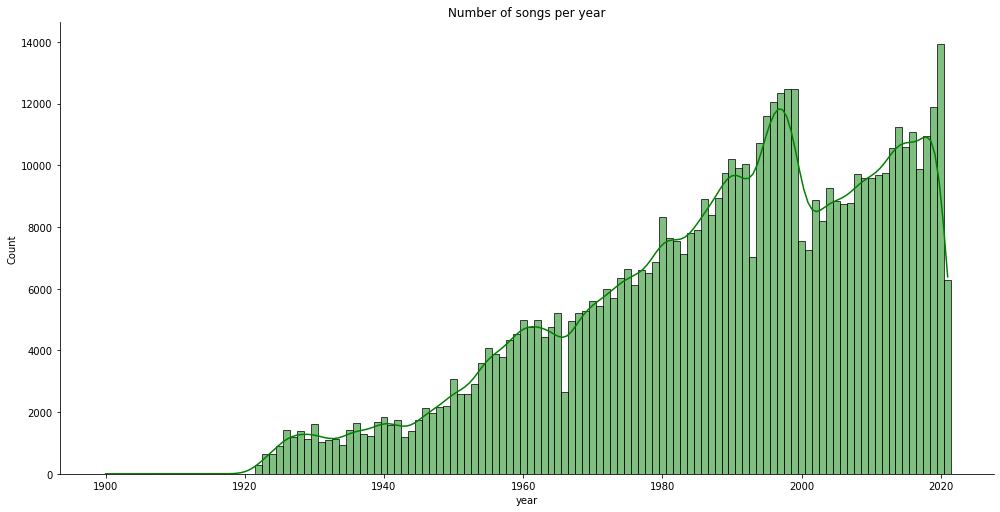

In [18]:
sns.displot(data["year"], discrete = True, aspect = 2, height = 7, kind = "hist", kde = True, color = 'green').set(title="Number of songs per year")

In [19]:
most_popularity = data.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False).head(10)

most_popularity

id                                    name  \
93802  4iJyoBOLtHqaGxP12qzhQI  Peaches (feat. Daniel Caesar & Giveon)   
93803  7lPN2DXiMsVn7XUKtOW1CS                         drivers license   
93804  3Ofmpyhv5UAQ70mENzB277                  Astronaut In The Ocean   
92810  5QO79kh1waicV47BqGRL3g                         Save Your Tears   
92811  6tDDoYIxWvMLTdKpjFkc1B                               telepatía   
92813  0VjIjW4GlUZAMYd2vXMi3b                         Blinding Lights   
93805  7MAibcTli4IisCtbHKrGMh                     Leave The Door Open   
92814  6f3Slt0GbA2bPZlz0aIFXN                            The Business   
91866  60ynsPSSKe6O3sfwRnIBRf                                 Streets   
92816  3FAJ6O0NOHQV8Mc5Ri6ENp                  Heartbreak Anniversary   

       popularity  duration_ms  explicit  \
93802         100       198082         1   
93803          99       242014         1   
93804          98       132780         0   
92810          97       215627         1   
92811          97       160191         0   
92813          96       200040         0   
93805          96       242096         0   
92814          95       164000         0   
91866          94       226987         1   
92816          94       198371         0   

                                              artists  \
93802    ['Justin Bieber', 'Daniel Caesar', 'Giveon']   
93803                              ['Olivia Rodrigo']   
93804                                 ['Masked Wolf']   
92810                                  ['The Weeknd']   
92811                                  ['Kali Uchis']   
92813                                  ['The Weeknd']   
93805  ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']   
92814                                      ['Tiësto']   
91866                                    ['Doja Cat']   
92816                                      ['Giveon']   

                                              id_artists release_date  \
93802  ['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...   2021-03-19   
93803                         ['1McMsnEElThX1knmY4oliG']   2021-01-08   
93804                         ['1uU7g3DNSbsu0QjSEqZtEd']   2021-01-06   
92810                         ['1Xyo4u8uXC1ZmMpatF05PJ']   2020-03-20   
92811                         ['1U1el3k54VvEUzo3ybLPlM']   2020-12-04   
92813                         ['1Xyo4u8uXC1ZmMpatF05PJ']   2020-03-20   
93805  ['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...   2021-03-05   
92814                         ['2o5jDhtHVPhrJdv3cEQ99Z']   2020-09-16   
91866                         ['5cj0lLjcoR7YOSnhnX0Po5']   2019-11-07   
92816                         ['4fxd5Ee7UefO4CUXgwJ7IP']   2020-03-27   

       danceability  energy  ...  loudness  mode  speechiness  acousticness  \
93802         0.677   0.696  ...    -6.181     1       0.1190       0.32100   
93803         0.585   0.436  ...    -8.761     1       0.0601       0.72100   
93804         0.778   0.695  ...    -6.865     0       0.0913       0.17500   
92810         0.680   0.826  ...    -5.487     1       0.0309       0.02120   
92811         0.653   0.524  ...    -9.016     0       0.0502       0.11200   
92813         0.514   0.730  ...    -5.934     1       0.0598       0.00146   
93805         0.586   0.616  ...    -7.964     1       0.0324       0.18200   
92814         0.798   0.620  ...    -7.079     0       0.2320       0.41400   
91866         0.749   0.463  ...    -8.433     1       0.0828       0.20800   
92816         0.449   0.465  ...    -8.964     1       0.0791       0.52400   

       instrumentalness  liveness  valence    tempo  time_signature  year  
93802          0.000000    0.4200    0.464   90.030               4  2021  
93803          0.000013    0.1050    0.132  143.874               4  2021  
93804          0.000000    0.1500    0.472  149.996               4  2021  
92810          0.000012    0.5430    0.644  118.051               4  2020  
92811          0.000000    0.2030    0.553   83.970     

- Top 10 music Tracks in the data set 

In [20]:
data['duration'] = data['duration_ms'].apply(lambda x : round(x/1000))
data.drop('duration_ms', inplace = True, axis=1)

In [21]:
data.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   explicit              artists                  id_artists release_date  \
0         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   1922-01-01   

   danceability  energy  key  ...  mode  speechiness  acousticness  \
0         0.645  0.4450    0  ...     1       0.4510         0.674   
1         0.695  0.2630    0  ...     1       0.9570         0.797   
2         0.434  0.1770    1  ...     1       0.0512         0.994   
3         0.321  0.0946    7  ...     1       0.0504         0.995   
4         0.402  0.1580    3  ...     0       0.0390         0.989   

   instrumentalness  liveness  valence    tempo  time_signature  year  \
0            0.7440     0.151    0.127  104.851               3  1922   
1            0.0000     0.148    0.655  102.009               1  1922   
2            0.0218     0.212    0.457  130.418               5  1922   
3            0.9180     0.104    0.397  169.980               3  1922   
4            0.1300     0.311    0.196  103.220               4  1922   

   duration  
0       127  
1        98  
2       182  
3       177  
4       163  

[5 rows x 21 columns]

In [22]:
data.drop('year', inplace = True, axis=1)

In [23]:
data = data.select_dtypes(exclude=['object'])
data= data.select_dtypes(exclude=['datetime64'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586601 non-null  int64  
 1   explicit          586601 non-null  int64  
 2   danceability      586601 non-null  float64
 3   energy            586601 non-null  float64
 4   key               586601 non-null  int64  
 5   loudness          586601 non-null  float64
 6   mode              586601 non-null  int64  
 7   speechiness       586601 non-null  float64
 8   acousticness      586601 non-null  float64
 9   instrumentalness  586601 non-null  float64
 10  liveness          586601 non-null  float64
 11  valence           586601 non-null  float64
 12  tempo             586601 non-null  float64
 13  time_signature    586601 non-null  int64  
 14  duration          586601 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 71.6 MB


In [25]:
data.describe().transpose()

count        mean         std   min       25%  \
popularity        586601.0   27.573212   18.369417   0.0   13.0000   
explicit          586601.0    0.044091    0.205298   0.0    0.0000   
danceability      586601.0    0.563612    0.166101   0.0    0.4530   
energy            586601.0    0.542071    0.251910   0.0    0.3430   
key               586601.0    5.221594    3.519420   0.0    2.0000   
loudness          586601.0  -10.205789    5.089422 -60.0  -12.8910   
mode              586601.0    0.658797    0.474114   0.0    0.0000   
speechiness       586601.0    0.104870    0.179902   0.0    0.0340   
acousticness      586601.0    0.449803    0.348812   0.0    0.0969   
instrumentalness  586601.0    0.113425    0.266843   0.0    0.0000   
liveness          586601.0    0.213933    0.184328   0.0    0.0983   
valence           586601.0    0.552306    0.257673   0.0    0.3460   
tempo             586601.0  118.467930   29.762942   0.0   95.6060   
time_signature    586601.0    3.873410    0.473112   0.0    4.0000   
duration          586601.0  230.054333  126.532822   3.0  175.0000   

                         50%        75%       max  
popularity         27.000000   41.00000   100.000  
explicit            0.000000    0.00000     1.000  
danceability        0.577000    0.68600     0.991  
energy              0.549000    0.74800     1.000  
key                 5.000000    8.00000    11.000  
loudness           -9.242000   -6.48100     5.376  
mode                1.000000    1.00000     1.000  
speechiness         0.044300    0.07630     0.971  
acousticness        0.422000    0.78400     0.996  
instrumentalness    0.000024    0.00955     1.000  
liveness            0.139000    0.27800     1.000  
valence             0.564000    0.76900     1.000  
tempo             117.387000  136.32400   246.381  
time_signature      4.000000    4.00000     5.000  
duration          215.000000  264.00000  5621.000

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

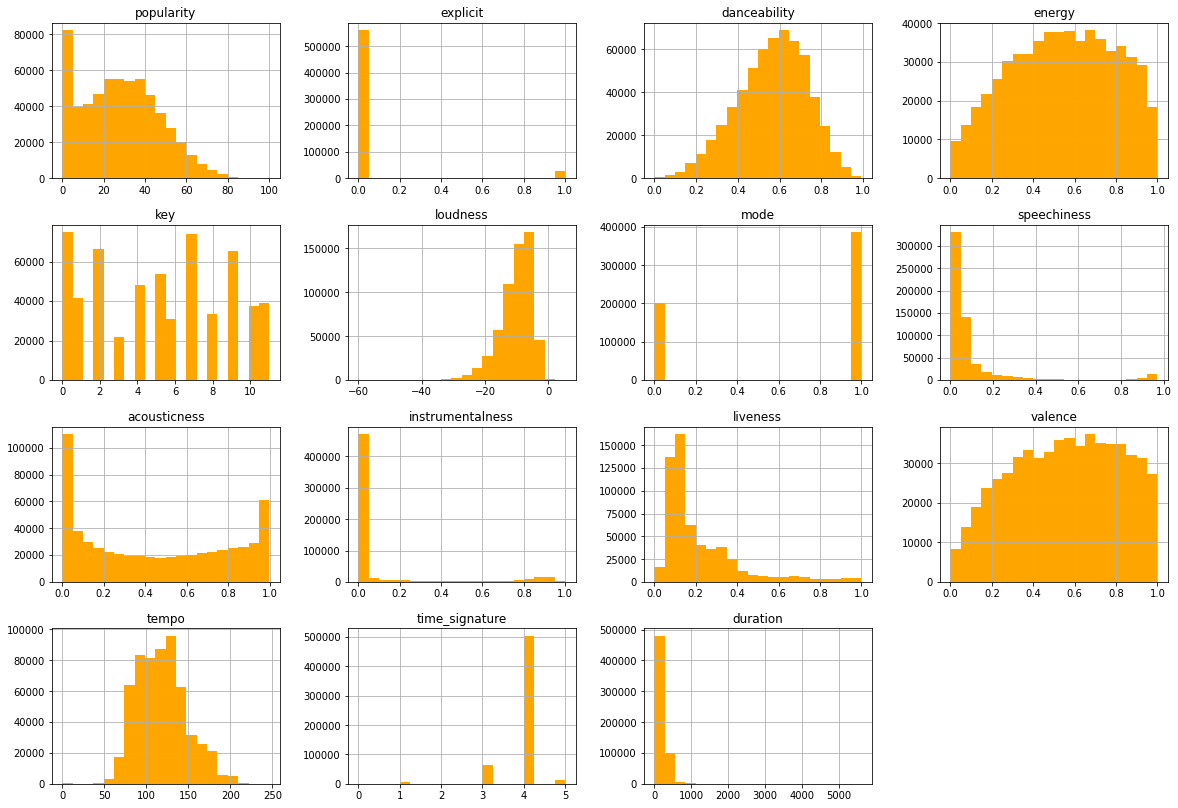

In [26]:
data.hist(bins = 20, color = 'orange', figsize = (20, 14)) 

In [27]:
from sklearn import preprocessing

feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(most_popularity[feat_cols].mean(), ignore_index=True)
mean_vals = mean_vals.append(data[feat_cols].mean(), ignore_index=True)

print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.show()

C:\Users\Khiranjit kumar deka\AppData\Local\Temp\ipykernel_19252\1956683109.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_vals = mean_vals.append(most_popularity[feat_cols].mean(), ignore_index=True)
C:\Users\Khiranjit kumar deka\AppData\Local\Temp\ipykernel_19252\1956683109.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_vals = mean_vals.append(data[feat_cols].mean(), ignore_index=True)


  danceability    energy speechiness acousticness instrumentalness  liveness  \
0       0.6469    0.6071     0.08376     0.267966         0.005642   0.23554   
1     0.563612  0.542071     0.10487     0.449803         0.113425  0.213933   

    valence  
0    0.4286  
1  0.552306  


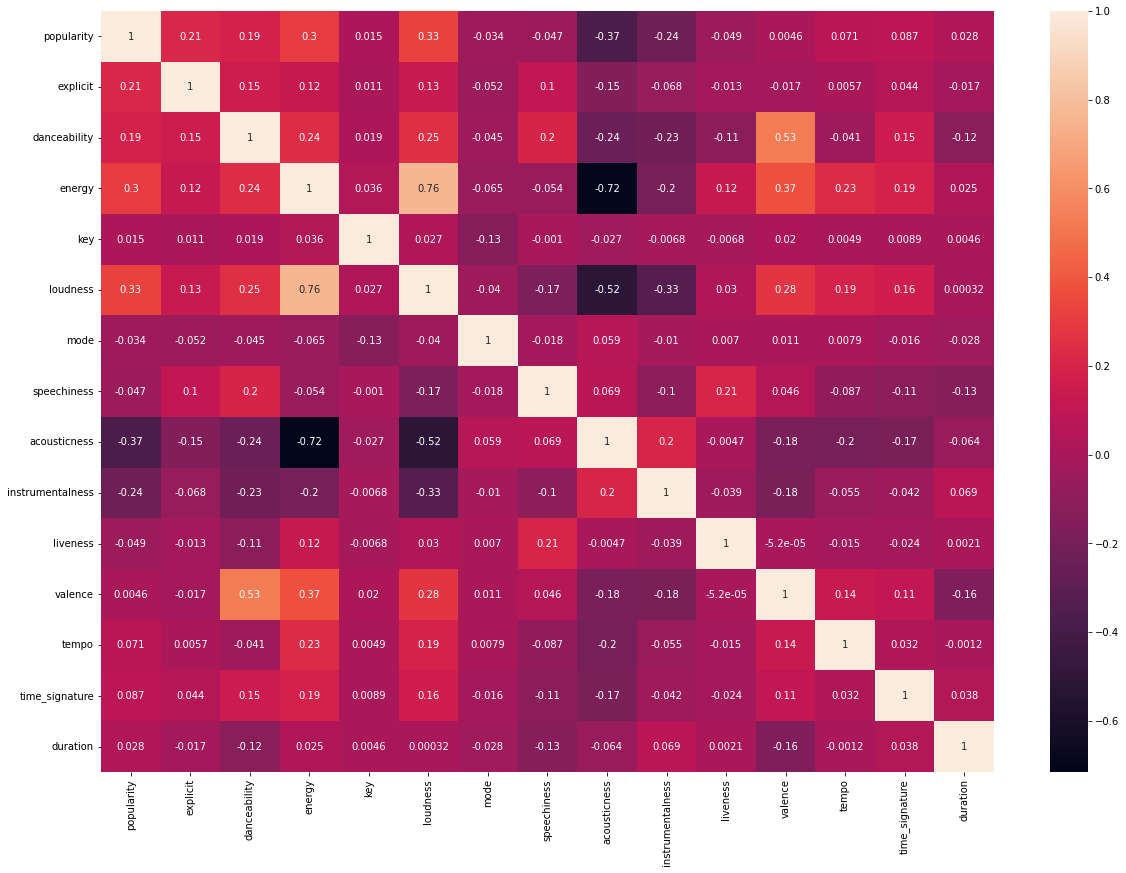

In [28]:
plt.figure(figsize = (20, 14))

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True) 
plt.show()

- Energy and loudness have a high positive correlation with a score of --> 0.76
- Energy and acousticness have a high negative correlation with a score of --> - 0.72
- other variables have acceptable correlation to use them 

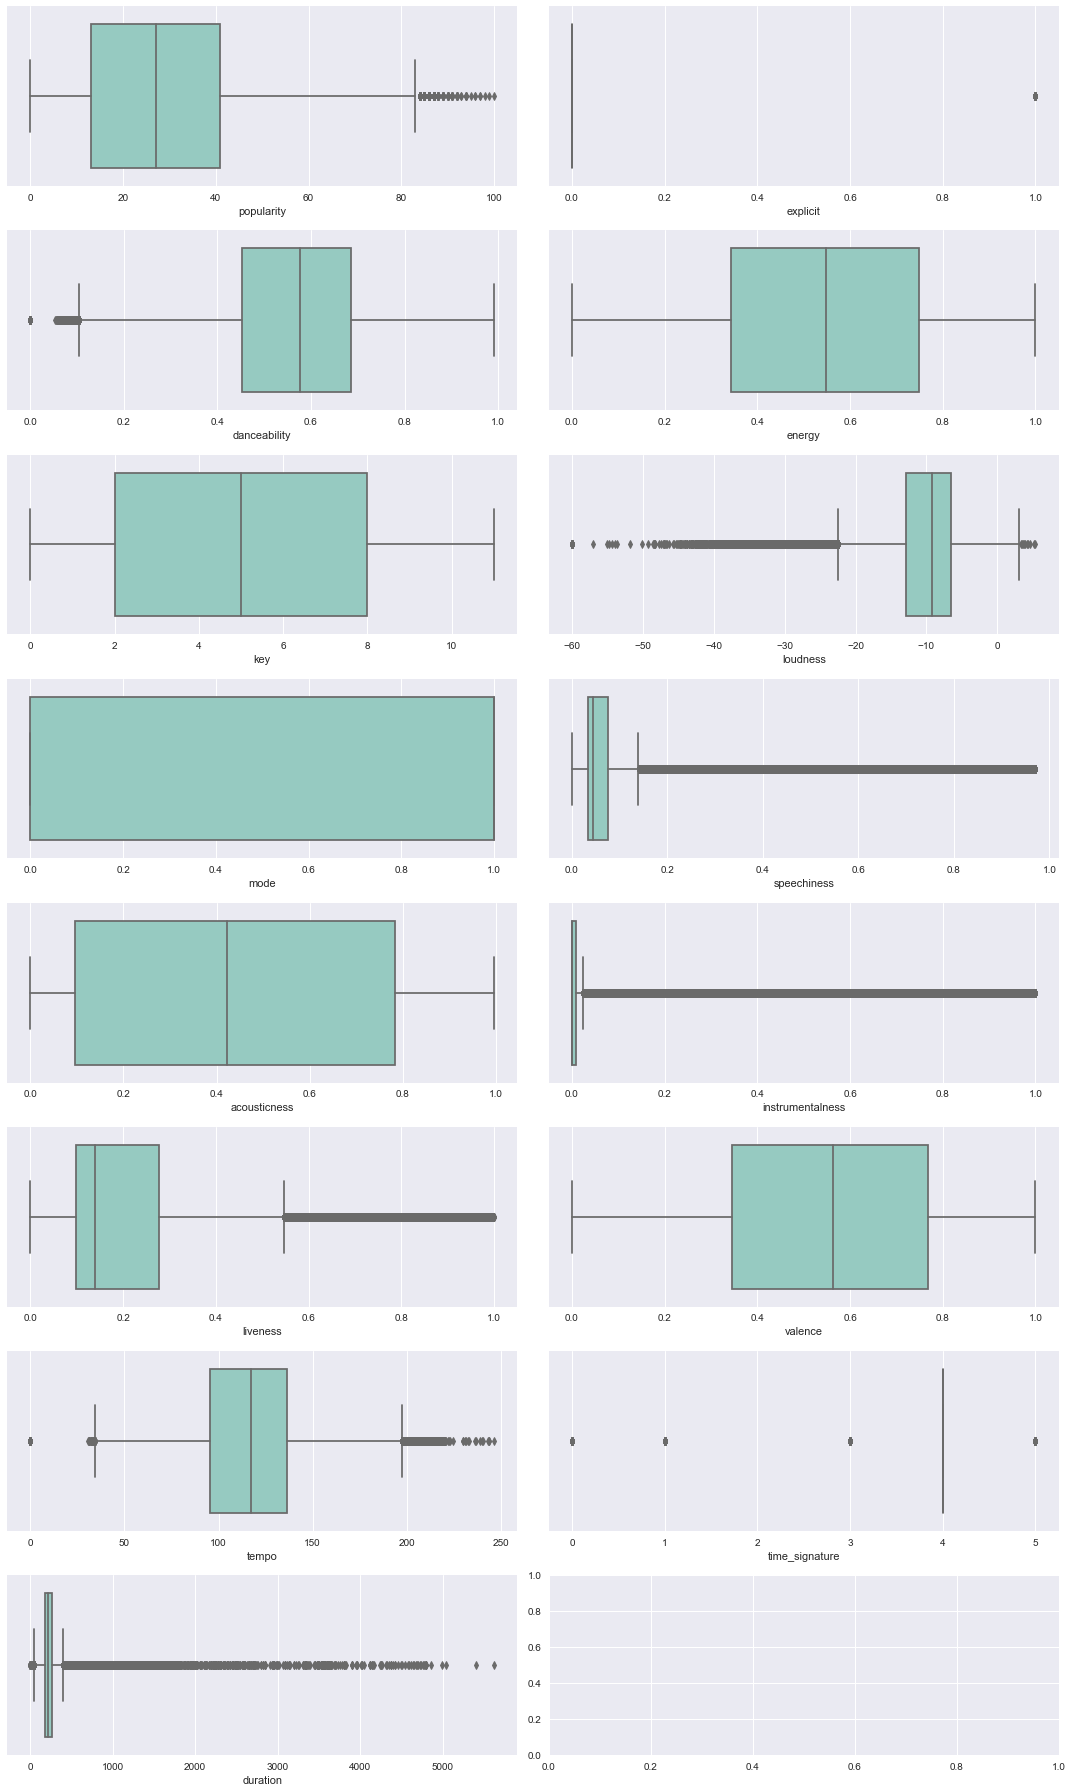

In [29]:
plt.style.use('seaborn')

num_df = data.select_dtypes(include = 'number')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(x=data[name], ax=axes[i, j], palette = 'Set3')
    y = y + 1

plt.tight_layout()
plt.show()

- duration_ms, loudness, speechiness, instrumentalness, liveness and tempo have lot of outliers. 


## New Feature 
- creating feature highly_popular with threshold 50 considering that songs with popularity more than 50 are popular 



In [30]:
threshold = 50
data['highly_popular'] = (data['popularity'] >= threshold ).astype(int)

In [31]:
data.head()

popularity  explicit  danceability  energy  key  loudness  mode  \
0           6         0         0.645  0.4450    0   -13.338     1   
1           0         0         0.695  0.2630    0   -22.136     1   
2           0         0         0.434  0.1770    1   -21.180     1   
3           0         0         0.321  0.0946    7   -27.961     1   
4           0         0         0.402  0.1580    3   -16.900     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.4510         0.674            0.7440     0.151    0.127  104.851   
1       0.9570         0.797            0.0000     0.148    0.655  102.009   
2       0.0512         0.994            0.0218     0.212    0.457  130.418   
3       0.0504         0.995            0.9180     0.104    0.397  169.980   
4       0.0390         0.989            0.1300     0.311    0.196  103.220   

   time_signature  duration  highly_popular  
0               3       127               0  
1               1        98               0  
2               5       182               0  
3               3       177               0  
4               4       163               0

In [32]:
data['highly_popular'].value_counts()

0    510758
1     75843
Name: highly_popular, dtype: int64

In [33]:
data = data.drop(labels = ['popularity'], axis = 1)

In [34]:
data.tail()

explicit  danceability  energy  key  loudness  mode  speechiness  \
586667         0         0.560   0.518    0    -7.471     0       0.0292   
586668         0         0.765   0.663    0    -5.223     1       0.0652   
586669         0         0.535   0.314    7   -12.823     0       0.0408   
586670         0         0.696   0.615   10    -6.212     1       0.0345   
586671         0         0.686   0.723    6    -7.067     1       0.0363   

        acousticness  instrumentalness  liveness  valence    tempo  \
586667         0.785          0.000000    0.0648   0.2110  131.896   
586668         0.141          0.000297    0.0924   0.6860  150.091   
586669         0.895          0.000150    0.0874   0.0663  145.095   
586670         0.206          0.000003    0.3050   0.4380   90.029   
586671         0.105          0.000000    0.2640   0.9750  112.204   

        time_signature  duration  highly_popular  
586667               4       258               1  
586668               4       153               1  
586669               4       188               1  
586670               4       142               1  
586671               4       214               0

## Data split 

### splitting the target variable . i.e highly_popular


In [35]:
np.random.seed(0)

In [36]:
X = data.copy()
y = X.pop("highly_popular")

In [37]:
X

explicit  danceability  energy  key  loudness  mode  speechiness  \
0              0         0.645  0.4450    0   -13.338     1       0.4510   
1              0         0.695  0.2630    0   -22.136     1       0.9570   
2              0         0.434  0.1770    1   -21.180     1       0.0512   
3              0         0.321  0.0946    7   -27.961     1       0.0504   
4              0         0.402  0.1580    3   -16.900     0       0.0390   
...          ...           ...     ...  ...       ...   ...          ...   
586667         0         0.560  0.5180    0    -7.471     0       0.0292   
586668         0         0.765  0.6630    0    -5.223     1       0.0652   
586669         0         0.535  0.3140    7   -12.823     0       0.0408   
586670         0         0.696  0.6150   10    -6.212     1       0.0345   
586671         0         0.686  0.7230    6    -7.067     1       0.0363   

        acousticness  instrumentalness  liveness  valence    tempo  \
0              0.674          0.744000    0.1510   0.1270  104.851   
1              0.797          0.000000    0.1480   0.6550  102.009   
2              0.994          0.021800    0.2120   0.4570  130.418   
3              0.995          0.918000    0.1040   0.3970  169.980   
4              0.989          0.130000    0.3110   0.1960  103.220   
...              ...               ...       ...      ...      ...   
586667         0.785          0.000000    0.0648   0.2110  131.896   
586668         0.141          0.000297    0.0924   0.6860  150.091   
586669         0.895          0.000150    0.0874   0.0663  145.095   
586670         0.206          0.000003    0.3050   0.4380   90.029   
586671         0.105          0.000000    0.2640   0.9750  112.204   

        time_signature  duration  
0                    3       127  
1                    1        98  
2                    5       182  
3                    3       177  
4                    4       163  
...                ...       ...  
586667               4       258  
586668               4       153  
586669               4       188  
586670               4       142  
586671               4       214  

[586601 rows x 14 columns]

In [38]:
y

0         0
1         0
2         0
3         0
4         0
         ..
586667    1
586668    1
586669    1
586670    1
586671    0
Name: highly_popular, Length: 586601, dtype: int32

#### Resampling 

In [39]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [40]:
rus = RandomUnderSampler() 

X_rus, y_rus = rus.fit_resample(X, y)

print(Counter(y_rus))

Counter({0: 75843, 1: 75843})


In [41]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X, y)

print(Counter(y_ros))

Counter({0: 510758, 1: 510758})


##### Train and test data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size = 0.8, test_size = 0.2, random_state = 0)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((817212, 14), (204304, 14), (817212,), (204304,))

#### Feature Scalling 
- handling the outliers using robust scalar

In [45]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()

X_train = rc.fit_transform(X_train)

X_test = rc.transform(X_test)

In [46]:
X_train[0]

array([ 0.        ,  0.4025974 ,  0.91008174,  0.66666667,  0.20604468,
        0.        ,  0.02004008, -0.47893281,  1.54546241, -0.424     ,
        0.29440389, -0.33710953,  0.        ,  0.26582278])

In [47]:
X_test[0]

array([ 0.00000000e+00,  4.50216450e-01, -7.05722071e-01,  8.33333333e-01,
        3.69338590e-01,  0.00000000e+00, -5.61122244e-02,  1.11273792e+00,
        5.97710263e+01, -1.47692308e-01, -1.11922141e-01,  5.15762052e-02,
        0.00000000e+00, -4.17721519e-01])

# Model building with different classification techniques and Evaluating each of them 
 - first creating a function for printing the results , the function will take a classifier , x train y train data and x test y test data


In [48]:
def print_score(classifier, X_train, y_train, X_test, y_test):
    
    print("TEST RESULTS:\n")

    
    y_test_pred = classifier.predict(X_test)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_test, y_test_pred, digits = 4)}\n')

    print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred)}\n')
    
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n')

    print(sns.heatmap(confusion_matrix(y_test , y_test_pred), annot=True,fmt="g", annot_kws={"size": 16}))
    
    print('\n\n')

## Train Size 80% Test Size 20%

## 1. Decision Tree

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9961    0.8694    0.9285    101882
           1     0.8847    0.9966    0.9373    102422

    accuracy                         0.9332    204304
   macro avg     0.9404    0.9330    0.9329    204304
weighted avg     0.9403    0.9332    0.9329    204304


ROC AUC Score: 0.9330294540392008

Confusion Matrix:
[[ 88578  13304]
 [   344 102078]]

AxesSubplot(0.125,0.125;0.62x0.755)





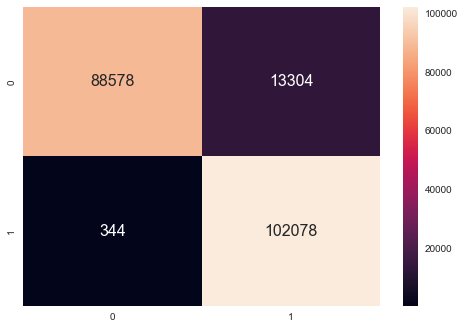

In [49]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier (criterion = 'entropy', random_state = 42)

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## 2) Random forest 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9967    0.9529    0.9743    101882
           1     0.9551    0.9969    0.9755    102422

    accuracy                         0.9749    204304
   macro avg     0.9759    0.9749    0.9749    204304
weighted avg     0.9758    0.9749    0.9749    204304


ROC AUC Score: 0.9748665008644245

Confusion Matrix:
[[ 97081   4801]
 [   322 102100]]

AxesSubplot(0.125,0.125;0.62x0.755)





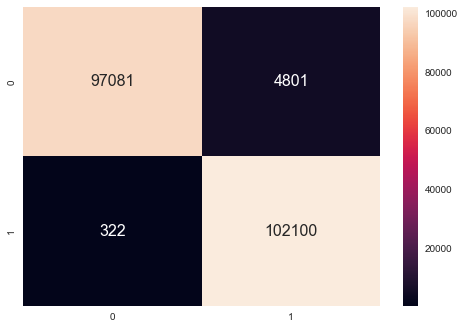

In [50]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(
    n_estimators = 100, 
    criterion = 'entropy', 
    random_state = 1)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## 3) K Nearest Neighbour KNN

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9526    0.7112    0.8144    101882
           1     0.7706    0.9648    0.8568    102422

    accuracy                         0.8383    204304
   macro avg     0.8616    0.8380    0.8356    204304
weighted avg     0.8613    0.8383    0.8357    204304


ROC AUC Score: 0.838003879368485

Confusion Matrix:
[[72462 29420]
 [ 3608 98814]]

AxesSubplot(0.125,0.125;0.62x0.755)





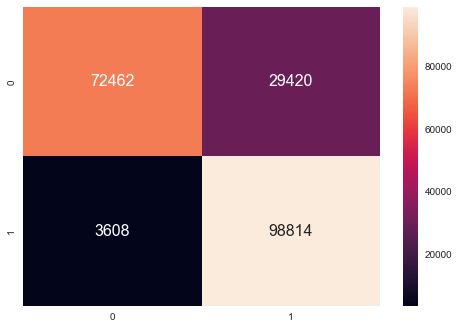

In [51]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier= KNN(n_neighbors = 5)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## 4) Naive Bayes

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7046    0.5097    0.5915    101882
           1     0.6175    0.7874    0.6922    102422

    accuracy                         0.6489    204304
   macro avg     0.6610    0.6486    0.6419    204304
weighted avg     0.6609    0.6489    0.6420    204304


ROC AUC Score: 0.6485630652939028

Confusion Matrix:
[[51932 49950]
 [21775 80647]]

AxesSubplot(0.125,0.125;0.62x0.755)





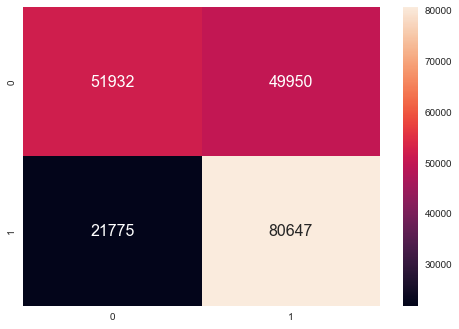

In [52]:
from sklearn.naive_bayes import GaussianNB as NB

classifier= NB()

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)


## 5) Logistic regression 

E:\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.6986    0.6700    0.6840    101882
           1     0.6846    0.7125    0.6983    102422

    accuracy                         0.6913    204304
   macro avg     0.6916    0.6912    0.6911    204304
weighted avg     0.6916    0.6913    0.6912    204304


ROC AUC Score: 0.6912421433786895

Confusion Matrix:
[[68262 33620]
 [29449 72973]]

AxesSubplot(0.125,0.125;0.62x0.755)





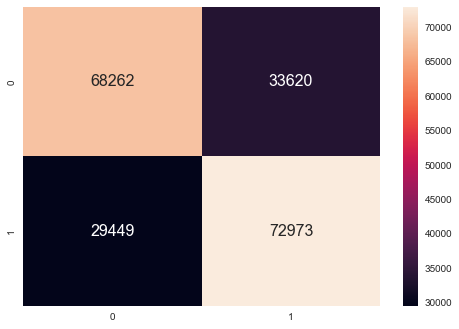

In [53]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

In [54]:
data.head().transpose()

0        1         2         3        4
explicit            0.000    0.000    0.0000    0.0000    0.000
danceability        0.645    0.695    0.4340    0.3210    0.402
energy              0.445    0.263    0.1770    0.0946    0.158
key                 0.000    0.000    1.0000    7.0000    3.000
loudness          -13.338  -22.136  -21.1800  -27.9610  -16.900
mode                1.000    1.000    1.0000    1.0000    0.000
speechiness         0.451    0.957    0.0512    0.0504    0.039
acousticness        0.674    0.797    0.9940    0.9950    0.989
instrumentalness    0.744    0.000    0.0218    0.9180    0.130
liveness            0.151    0.148    0.2120    0.1040    0.311
valence             0.127    0.655    0.4570    0.3970    0.196
tempo             104.851  102.009  130.4180  169.9800  103.220
time_signature      3.000    1.000    5.0000    3.0000    4.000
duration          127.000   98.000  182.0000  177.0000  163.000
highly_popular      0.000    0.000    0.0000    0.0000    0.000

## Train Size 70% Test size 30%

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size = 0.7, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((715061, 14), (306455, 14), (715061,), (306455,))

In [56]:
rc = RobustScaler()

X_train = rc.fit_transform(X_train)

X_test = rc.transform(X_test)

## Decision Tree

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9925    0.8556    0.9190    153139
           1     0.8732    0.9936    0.9295    153316

    accuracy                         0.9246    306455
   macro avg     0.9329    0.9246    0.9243    306455
weighted avg     0.9329    0.9246    0.9243    306455


ROC AUC Score: 0.9245852983455523

Confusion Matrix:
[[131024  22115]
 [   984 152332]]

AxesSubplot(0.125,0.125;0.62x0.755)





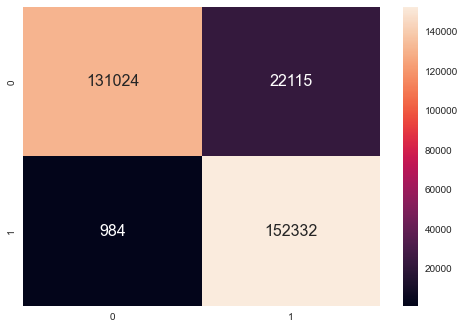

In [57]:
classifier = DecisionTreeClassifier (criterion = 'entropy', random_state = 42)

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Random Forest 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9936    0.9440    0.9681    153139
           1     0.9467    0.9939    0.9697    153316

    accuracy                         0.9690    306455
   macro avg     0.9701    0.9689    0.9689    306455
weighted avg     0.9701    0.9690    0.9689    306455


ROC AUC Score: 0.9689467569310477

Confusion Matrix:
[[144558   8581]
 [   931 152385]]

AxesSubplot(0.125,0.125;0.62x0.755)





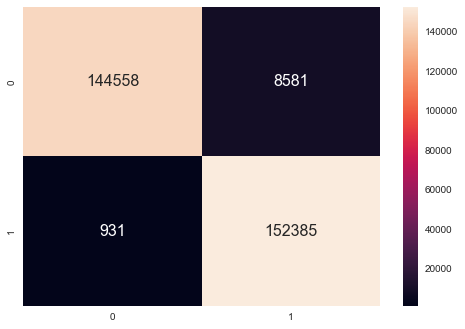

In [58]:
classifier = RandomForestClassifier(
    n_estimators = 100, 
    criterion = 'entropy', 
    random_state = 1)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## K Nearest Neighbour KNN

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9272    0.6962    0.7953    153139
           1     0.7570    0.9454    0.8408    153316

    accuracy                         0.8209    306455
   macro avg     0.8421    0.8208    0.8180    306455
weighted avg     0.8421    0.8209    0.8180    306455


ROC AUC Score: 0.8208054984265165

Confusion Matrix:
[[106619  46520]
 [  8373 144943]]

AxesSubplot(0.125,0.125;0.62x0.755)





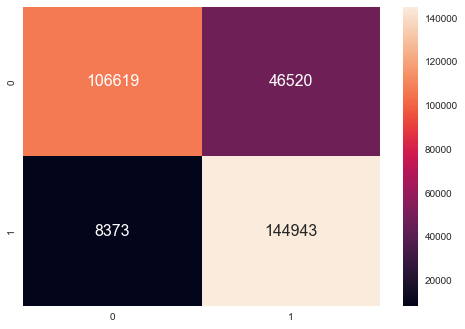

In [59]:
classifier= KNN(n_neighbors = 5)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Naive Bayes 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7058    0.5104    0.5924    153139
           1     0.6169    0.7875    0.6918    153316

    accuracy                         0.6490    306455
   macro avg     0.6613    0.6489    0.6421    306455
weighted avg     0.6613    0.6490    0.6421    306455


ROC AUC Score: 0.6489157444135799

Confusion Matrix:
[[ 78155  74984]
 [ 32583 120733]]

AxesSubplot(0.125,0.125;0.62x0.755)





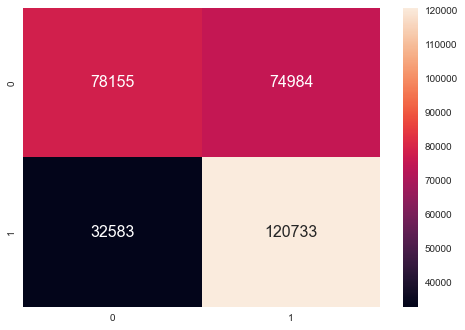

In [60]:
classifier= NB()

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Logistic Regression 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.6995    0.6686    0.6837    153139
           1     0.6830    0.7131    0.6977    153316

    accuracy                         0.6909    306455
   macro avg     0.6913    0.6909    0.6907    306455
weighted avg     0.6913    0.6909    0.6907    306455


ROC AUC Score: 0.6908846667310613

Confusion Matrix:
[[102393  50746]
 [ 43980 109336]]

AxesSubplot(0.125,0.125;0.62x0.755)





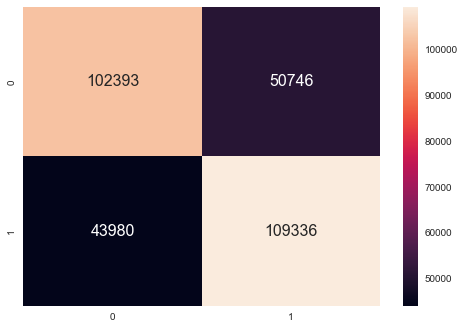

In [61]:
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

##                                 Train size 60% Test size 40%

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size = 0.6, test_size = 0.4, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((612909, 14), (408607, 14), (612909,), (408607,))

In [63]:
rc = RobustScaler()

X_train = rc.fit_transform(X_train)

X_test = rc.transform(X_test)

## Decision Tree

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9865    0.8411    0.9080    204261
           1     0.8616    0.9885    0.9207    204346

    accuracy                         0.9148    408607
   macro avg     0.9240    0.9148    0.9143    408607
weighted avg     0.9240    0.9148    0.9143    408607


ROC AUC Score: 0.914800128082934

Confusion Matrix:
[[171805  32456]
 [  2351 201995]]

AxesSubplot(0.125,0.125;0.62x0.755)





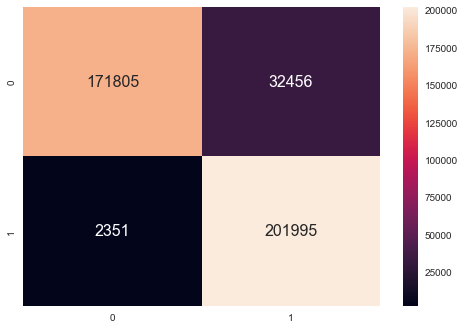

In [64]:
classifier = DecisionTreeClassifier (criterion = 'entropy', random_state = 42)

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Random Forest 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9879    0.9324    0.9593    204261
           1     0.9360    0.9886    0.9616    204346

    accuracy                         0.9605    408607
   macro avg     0.9620    0.9605    0.9605    408607
weighted avg     0.9619    0.9605    0.9605    408607


ROC AUC Score: 0.9604818549737579

Confusion Matrix:
[[190444  13817]
 [  2328 202018]]

AxesSubplot(0.125,0.125;0.62x0.755)





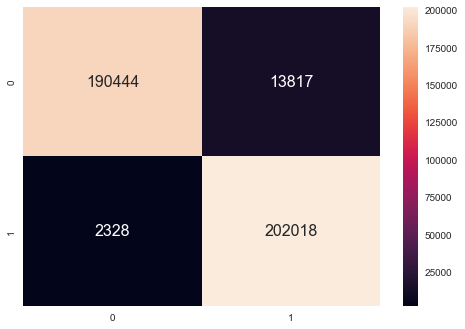

In [65]:
classifier = RandomForestClassifier(
    n_estimators = 100, 
    criterion = 'entropy', 
    random_state = 1)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)


## K Nearest Neighbour

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.8963    0.6828    0.7751    204261
           1     0.7439    0.9210    0.8231    204346

    accuracy                         0.8020    408607
   macro avg     0.8201    0.8019    0.7991    408607
weighted avg     0.8201    0.8020    0.7991    408607


ROC AUC Score: 0.8019316245328734

Confusion Matrix:
[[139473  64788]
 [ 16134 188212]]

AxesSubplot(0.125,0.125;0.62x0.755)





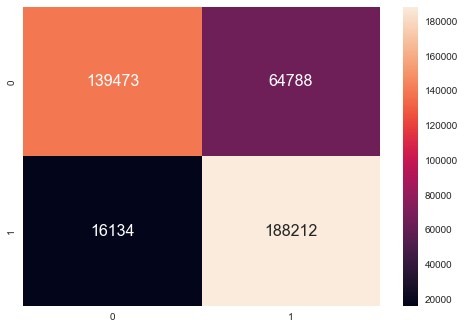

In [66]:
classifier= KNN(n_neighbors = 5)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Naive Bayes 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7054    0.5111    0.5927    204261
           1     0.6168    0.7866    0.6914    204346

    accuracy                         0.6489    408607
   macro avg     0.6611    0.6489    0.6421    408607
weighted avg     0.6611    0.6489    0.6421    408607


ROC AUC Score: 0.6488540184230996

Confusion Matrix:
[[104405  99856]
 [ 43613 160733]]

AxesSubplot(0.125,0.125;0.62x0.755)





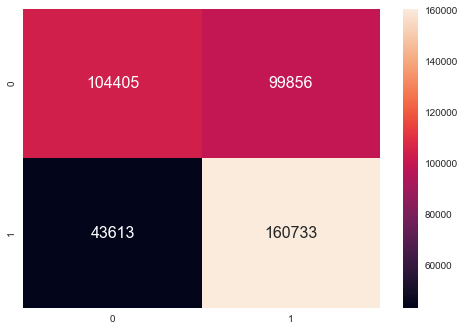

In [67]:
classifier= NB()

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Logistic Regression 

E:\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7005    0.6695    0.6847    204261
           1     0.6837    0.7139    0.6984    204346

    accuracy                         0.6917    408607
   macro avg     0.6921    0.6917    0.6916    408607
weighted avg     0.6921    0.6917    0.6916    408607


ROC AUC Score: 0.6917064952029329

Confusion Matrix:
[[136761  67500]
 [ 58469 145877]]

AxesSubplot(0.125,0.125;0.62x0.755)





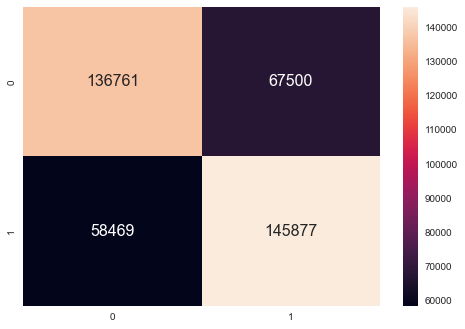

In [68]:
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Train Size 90% Test Size 10%

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size = 0.5, test_size = 0.5, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((510758, 14), (510758, 14), (510758,), (510758,))

In [70]:
rc = RobustScaler()

X_train = rc.fit_transform(X_train)

X_test = rc.transform(X_test)

## Decision Tree 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9737    0.8224    0.8917    255493
           1     0.8462    0.9778    0.9072    255265

    accuracy                         0.9000    510758
   macro avg     0.9099    0.9001    0.8994    510758
weighted avg     0.9100    0.9000    0.8994    510758


ROC AUC Score: 0.900081278240834

Confusion Matrix:
[[210115  45378]
 [  5674 249591]]

AxesSubplot(0.125,0.125;0.62x0.755)





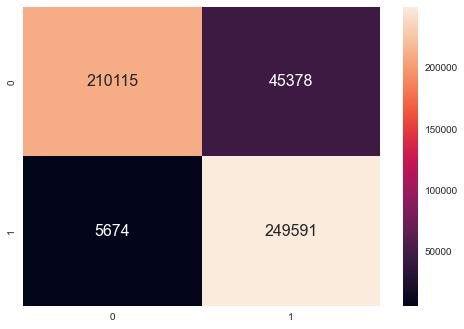

In [71]:
classifier = DecisionTreeClassifier (criterion = 'entropy', random_state = 42)

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Random Forest

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9779    0.9169    0.9464    255493
           1     0.9217    0.9793    0.9496    255265

    accuracy                         0.9480    510758
   macro avg     0.9498    0.9481    0.9480    510758
weighted avg     0.9498    0.9480    0.9480    510758


ROC AUC Score: 0.9480578130688034

Confusion Matrix:
[[234252  21241]
 [  5296 249969]]

AxesSubplot(0.125,0.125;0.62x0.755)





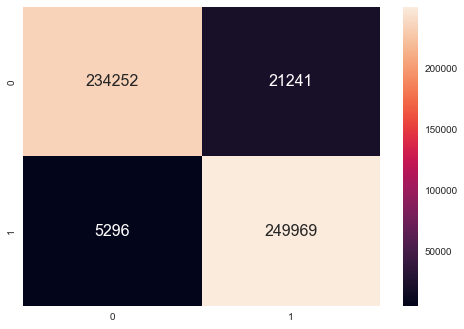

In [72]:
classifier = RandomForestClassifier(
    n_estimators = 100, 
    criterion = 'entropy', 
    random_state = 1)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## K Nearest Neighbour KNN

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.8612    0.6715    0.7546    255493
           1     0.7306    0.8917    0.8031    255265

    accuracy                         0.7815    510758
   macro avg     0.7959    0.7816    0.7789    510758
weighted avg     0.7959    0.7815    0.7788    510758


ROC AUC Score: 0.7815640771486212

Confusion Matrix:
[[171552  83941]
 [ 27652 227613]]

AxesSubplot(0.125,0.125;0.62x0.755)





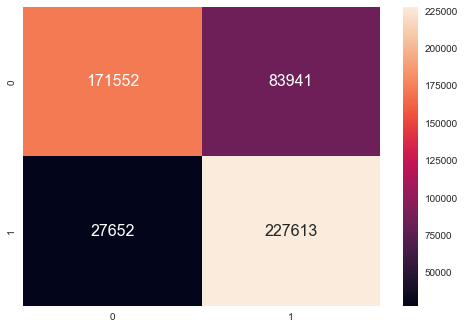

In [73]:
classifier= KNN(n_neighbors = 5)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Naive Bayes 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7064    0.5092    0.5918    255493
           1     0.6160    0.7882    0.6916    255265

    accuracy                         0.6486    510758
   macro avg     0.6612    0.6487    0.6417    510758
weighted avg     0.6613    0.6486    0.6417    510758


ROC AUC Score: 0.6486962598463888

Confusion Matrix:
[[130098 125395]
 [ 54068 201197]]

AxesSubplot(0.125,0.125;0.62x0.755)





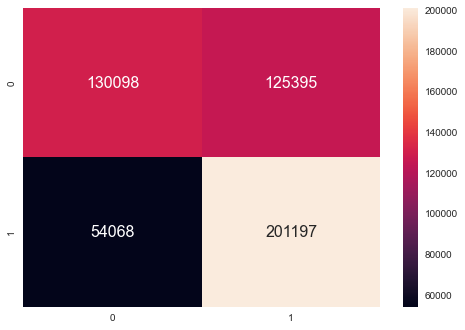

In [74]:
classifier= NB()

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Logistic Regression 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7013    0.6691    0.6848    255493
           1     0.6834    0.7148    0.6987    255265

    accuracy                         0.6919    510758
   macro avg     0.6924    0.6920    0.6918    510758
weighted avg     0.6924    0.6919    0.6918    510758


ROC AUC Score: 0.69195627931784

Confusion Matrix:
[[170957  84536]
 [ 72805 182460]]

AxesSubplot(0.125,0.125;0.62x0.755)





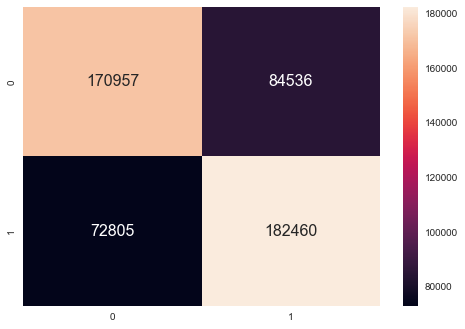

In [75]:
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Train Size 50% Test Size 50%

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size = 0.9, test_size = 0.1, random_state = 0)

## Decision Tree 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9980    0.8779    0.9341     50935
           1     0.8916    0.9983    0.9419     51217

    accuracy                         0.9383    102152
   macro avg     0.9448    0.9381    0.9380    102152
weighted avg     0.9446    0.9383    0.9380    102152


ROC AUC Score: 0.9380925152313931

Confusion Matrix:
[[44716  6219]
 [   88 51129]]

AxesSubplot(0.125,0.125;0.62x0.755)





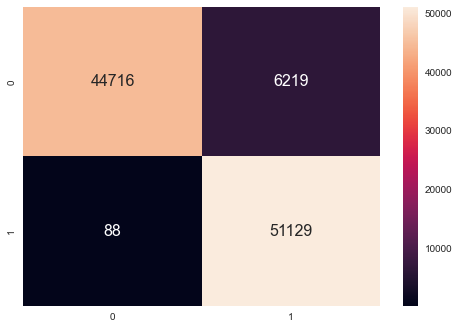

In [78]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier (criterion = 'entropy', random_state = 42)

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Random Forest 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9981    0.9582    0.9777     50935
           1     0.9600    0.9982    0.9787     51217

    accuracy                         0.9782    102152
   macro avg     0.9791    0.9782    0.9782    102152
weighted avg     0.9790    0.9782    0.9782    102152


ROC AUC Score: 0.9781928590415175

Confusion Matrix:
[[48805  2130]
 [   92 51125]]

AxesSubplot(0.125,0.125;0.62x0.755)





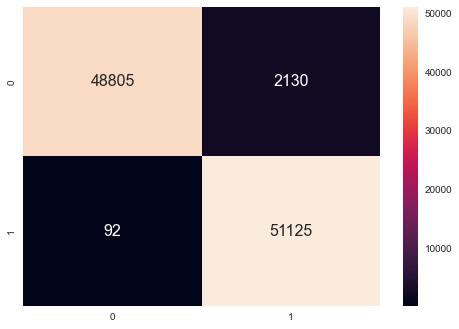

In [79]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(
    n_estimators = 100, 
    criterion = 'entropy', 
    random_state = 1)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## K Nearest Neighbour 

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9640    0.7096    0.8175     50935
           1     0.7713    0.9736    0.8607     51217

    accuracy                         0.8420    102152
   macro avg     0.8676    0.8416    0.8391    102152
weighted avg     0.8674    0.8420    0.8392    102152


ROC AUC Score: 0.841635796454745

Confusion Matrix:
[[36146 14789]
 [ 1351 49866]]

AxesSubplot(0.125,0.125;0.62x0.755)





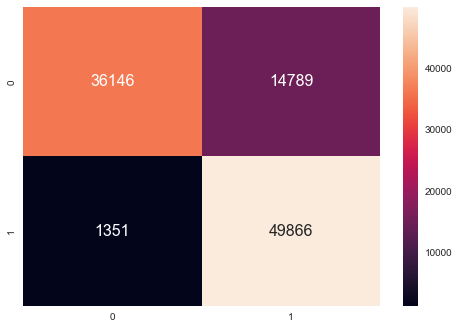

In [80]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier= KNN(n_neighbors = 5)

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Naive Bayes

TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7074    0.5091    0.5921     50935
           1     0.6182    0.7906    0.6939     51217

    accuracy                         0.6502    102152
   macro avg     0.6628    0.6498    0.6430    102152
weighted avg     0.6627    0.6502    0.6431    102152


ROC AUC Score: 0.6498386442920132

Confusion Matrix:
[[25932 25003]
 [10727 40490]]

AxesSubplot(0.125,0.125;0.62x0.755)





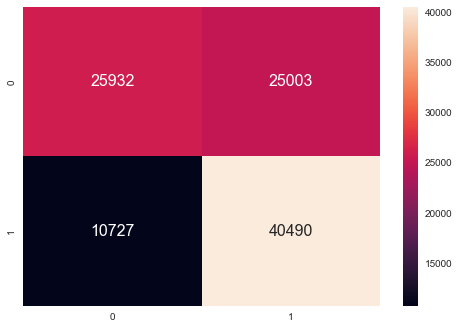

In [81]:
from sklearn.naive_bayes import GaussianNB as NB

classifier= NB()

classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Logistic Regression 

E:\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.6882    0.6766    0.6824     50935
           1     0.6837    0.6951    0.6893     51217

    accuracy                         0.6859    102152
   macro avg     0.6859    0.6859    0.6859    102152
weighted avg     0.6859    0.6859    0.6859    102152


ROC AUC Score: 0.6858641548195856

Confusion Matrix:
[[34464 16471]
 [15616 35601]]

AxesSubplot(0.125,0.125;0.62x0.755)





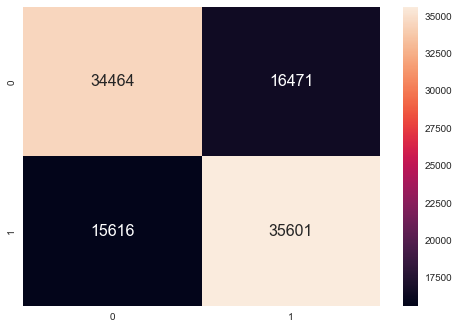

In [82]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train,y_train)

print_score(classifier, X_train, y_train, X_test, y_test)

## Visualizing The Comparison 

In [83]:
data1 = {'Classification Model': ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes','Logistic Regression'],
        '90% Train Data': [93.80, 97.81, 84.16, 64.98, 68.58],
        '80% Train Data': [93.30, 97.48, 83.80, 64.85, 69.12],
        '70% Train Data': [92.45, 96.89, 82.08, 64.89, 69.08],
        '60% Train Data': [91.48, 96.04, 80.19, 64.88, 69.17],
        '50% Train Data': [90.00, 94.80, 78.15, 64.86, 61.19]
       }
 
df1 = pd.DataFrame(data1)
 
df1

Classification Model  90% Train Data  80% Train Data  70% Train Data  \
0        Decision Tree           93.80           93.30           92.45   
1        Random Forest           97.81           97.48           96.89   
2                  KNN           84.16           83.80           82.08   
3          Naive Bayes           64.98           64.85           64.89   
4  Logistic Regression           68.58           69.12           69.08   

   60% Train Data  50% Train Data  
0           91.48           90.00  
1           96.04           94.80  
2           80.19           78.15  
3           64.88           64.86  
4           69.17           61.19

In [84]:
data2 = {'Classification Model': ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes','Logistic Regression'],
        '90% Train Data': [93.59, 99.16, 84.55, 57.55, 61.13],
        '80% Train Data': [93.66, 98.90, 83.80, 56.77, 62.51],
        '70% Train Data': [92.23, 98.62, 80.22, 56.74, 60.41],
        '60% Train Data': [91.60, 98.03, 78.12, 56.56, 61.15],
        '50% Train Data': [90.49, 97.26, 84.55, 56.54, 61.02]
       }
df2 = pd.DataFrame(data2)
df2

Classification Model  90% Train Data  80% Train Data  70% Train Data  \
0        Decision Tree           93.59           93.66           92.23   
1        Random Forest           99.16           98.90           98.62   
2                  KNN           84.55           83.80           80.22   
3          Naive Bayes           57.55           56.77           56.74   
4  Logistic Regression           61.13           62.51           60.41   

   60% Train Data  50% Train Data  
0           91.60           90.49  
1           98.03           97.26  
2           78.12           84.55  
3           56.56           56.54  
4           61.15           61.02

#                                     For Dataset 1

### Comparison of Accuracy of the models in every Train-Test Size For The Kaggle Dataset

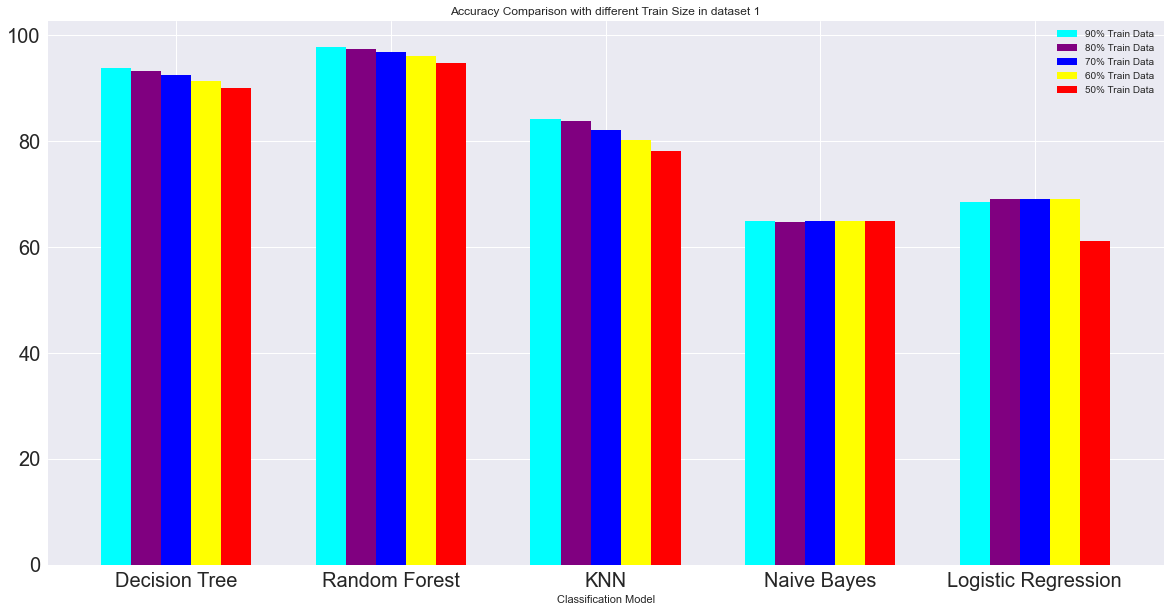

In [158]:
df1.plot.bar(rot=0,width=0.7,figsize= (20, 10),fontsize= 20, x="Classification Model", title="Accuracy Comparison with different Train Size in dataset 1", color =["cyan", "purple","blue","yellow","red"]);


# Dataset 2

### Comparison of Accuracy of the models in every Train-Test Size For The accumulated Dataset

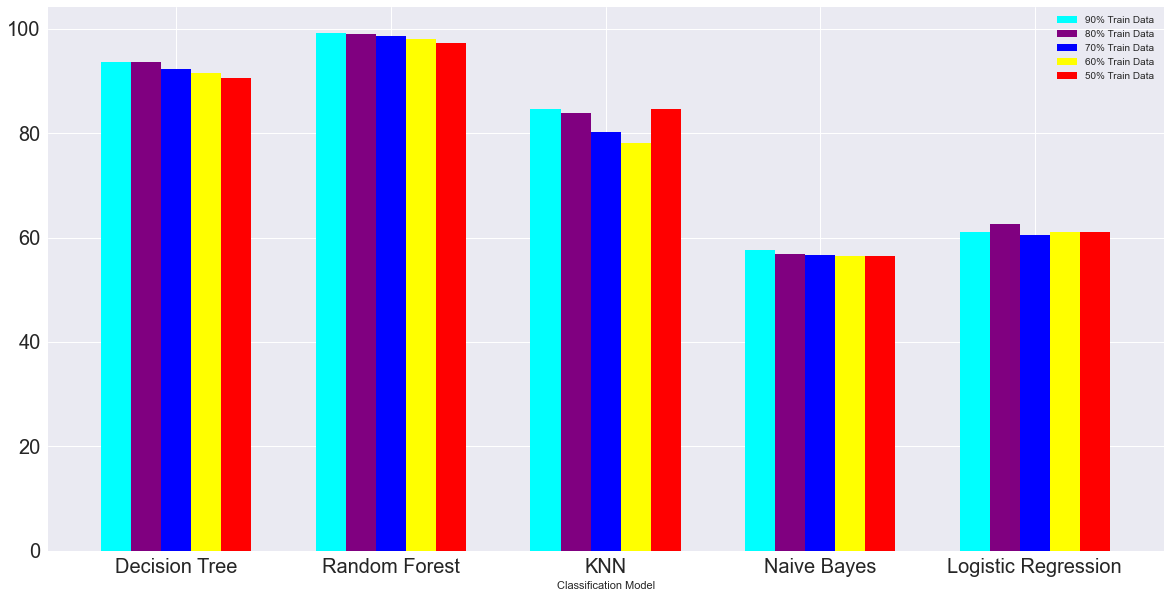

In [123]:
df2.plot.bar(rot = 0,width=0.7,figsize= (20, 10),fontsize= 20, x="Classification Model",color =["cyan", "purple","blue","yellow","red"] );


### Performance of best split ratio in Dataset 1

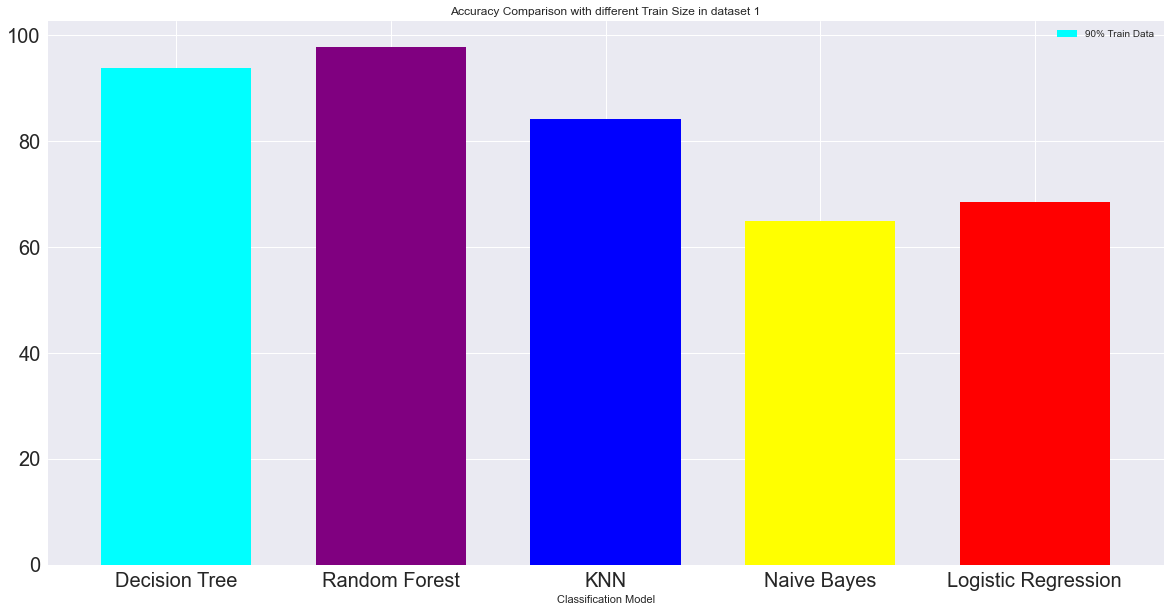

In [121]:
df1.plot.bar(rot=0,width=0.7,figsize= (20, 10),fontsize= 20, x="Classification Model", y= "90% Train Data" ,title="Accuracy Comparison with different Train Size in dataset 1",color =["cyan", "purple","blue","yellow","red"]);


### Performance of best split ratio in Dataset 2

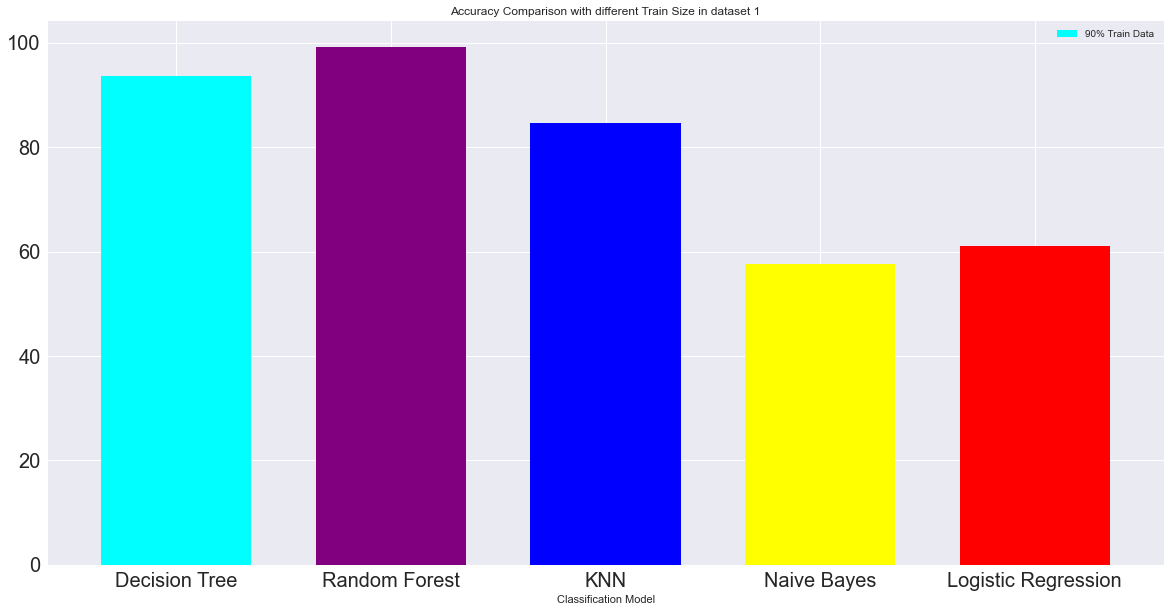

In [122]:
df2.plot.bar(rot=0,width=0.7,figsize= (20, 10),fontsize= 20, x="Classification Model", y= "90% Train Data" ,title="Accuracy Comparison with different Train Size in dataset 1",color =["cyan", "purple","blue","yellow","red"]);